<a href="https://colab.research.google.com/github/IBeliveInMagic/Ciencia_de_Dados/blob/main/KNN_Reclama%C3%A7%C3%B5esdeConsumidores.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

*O algoritmo KNN também chamado de K-nearest Neighbors possui como objetivo determinar qual grupo uma determinada amostra vai pertencer com base nas amostras vizinhas através do cálculo da distância euclidiana entre seus vizinhos.*




# **Importando as bibliotecas**




In [1]:
!pip install mlxtend

In [2]:
#Importa as bibliotecas

import plotly.graph_objects as go
import pandas as pd
import numpy as np
import plotly.express as px
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter("ignore")

from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import GridSearchCV
from mlxtend.plotting import plot_decision_regions


# **Importando os dados**

In [3]:
#Importar os dados

dataset = pd.read_csv('finalizadas_2021-10.csv',sep=';',encoding='utf-8')

dataset.tail()

,Região,UF,Cidade,Sexo,Faixa Etária,Data Finalização,Tempo Resposta,Nome Fantasia,Segmento de Mercado,Área,Assunto,Grupo Problema,Problema,Como Comprou Contratou,Procurou Empresa,Respondida,Situação,Avaliação Reclamação,Nota do Consumidor
120703,SE,MG,Ipatinga,F,entre 31 a 40 anos,2021-10-30,0.0,SKY,"Operadoras de Telecomunicações (Telefonia, Int...",Telecomunicações,TV por Assinatura,Cobrança / Contestação,Renegociação / parcelamento de dívida,Domicílio,S,S,Finalizada avaliada,Resolvida,5.0
120704,NE,PI,Teresina,F,entre 41 a 50 anos,2021-10-29,0.0,Equatorial Piauí,Energia Elétrica,"Água, Energia, Gás",Energia Elétrica,Cobrança / Contestação,Cobrança por Irregularidade ou defeito na medição,Não comprei / contratei,S,S,Finalizada avaliada,Resolvida,4.0
120705,SE,SP,Bragança Paulista,M,entre 51 a 60 anos,2021-10-30,1.0,SKY,"Operadoras de Telecomunicações (Telefonia, Int...",Telecomunicações,TV por Assinatura,Cobrança / Contestação,Cobrança após cancelamento do serviço,Loja física,S,S,Finalizada avaliada,Resolvida,4.0
120706,SE,RJ,Macaé,M,entre 21 a 30 anos,2021-10-30,1.0,SKY,"Operadoras de Telecomunicações (Telefonia, Int...",Telecomunicações,TV por Assinatura,Dados Pessoais e Privacidade,Dificuldade de reclamar ou de obter tratamento...,Não comprei / contratei,N,S,Finalizada avaliada,Resolvida,1.0
120707,NE,BA,Itabuna,F,entre 31 a 40 anos,2021-10-30,1.0,123 Milhas,"Viagens, Turismo e Hospedagem",Turismo/Viagens,Hospedagem,Cobrança / Contestação,Dificuldade / atraso na devolução de valores p...,Internet,S,S,Finalizada avaliada,Não Resolvida,1.0


# **Tratamento de dados**

In [4]:
# Separando as colunas Sexo, Faixa Etária e Respondida
df = dataset.iloc[:,[1,9,3,4,15]] 
df.head()

,UF,Área,Sexo,Faixa Etária,Respondida
0,PI,Serviços Financeiros,F,entre 21 a 30 anos,N
1,RS,Serviços Financeiros,F,entre 61 a 70 anos,N
2,RS,Serviços Financeiros,M,entre 61 a 70 anos,N
3,RS,Produtos de Telefonia e Informática,M,entre 21 a 30 anos,S
4,PE,Telecomunicações,M,entre 21 a 30 anos,S


In [5]:
#Excluir dados NaN
df = df.dropna()

In [6]:
# Substituindo o nome da coluna "Faixa Etária" para "FaixaEtária"
df.rename(columns={'Faixa Etária': 'FaixaEtária'}, inplace=True)

In [7]:
# Transformar os dados categóricos em numéricos

label_encoder1 = LabelEncoder()
label_resp1 = label_encoder1.fit_transform(df.Respondida)

label_encoder2 = LabelEncoder()
label_resp2 = label_encoder2.fit_transform(df.Sexo)

label_encoder3 = LabelEncoder()
label_resp3 = label_encoder3.fit_transform(df.FaixaEtária)

label_encoder4 = LabelEncoder()
label_resp4 = label_encoder4.fit_transform(df.UF)

label_encoder5 = LabelEncoder()
label_resp5 = label_encoder5.fit_transform(df.Área)

In [8]:
#Colocando os dados tranformados na nova tabela
df['RespondidaNum'] = label_resp1
df['SexoNum'] = label_resp2
df['FaixaEtáriaNum'] = label_resp3
df['UFNum'] = label_resp3
df['ÁreaNum'] = label_resp3
df

,UF,Área,Sexo,FaixaEtária,Respondida,RespondidaNum,SexoNum,FaixaEtáriaNum,UFNum,ÁreaNum
0,PI,Serviços Financeiros,F,entre 21 a 30 anos,N,0,0,1,1,1
1,RS,Serviços Financeiros,F,entre 61 a 70 anos,N,0,0,5,5,5
2,RS,Serviços Financeiros,M,entre 61 a 70 anos,N,0,1,5,5,5
3,RS,Produtos de Telefonia e Informática,M,entre 21 a 30 anos,S,1,1,1,1,1
4,PE,Telecomunicações,M,entre 21 a 30 anos,S,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...
120703,MG,Telecomunicações,F,entre 31 a 40 anos,S,1,0,2,2,2
120704,PI,"Água, Energia, Gás",F,entre 41 a 50 anos,S,1,0,3,3,3
120705,SP,Telecomunicações,M,entre 51 a 60 anos,S,1,1,4,4,4
120706,RJ,Telecomunicações,M,entre 21 a 30 anos,S,1,1,1,1,1


In [9]:
#Excluindo as tabelas categóricas antigas

df = df.drop('FaixaEtária',axis=1)
df = df.drop('Sexo',axis=1)
df = df.drop('Respondida',axis=1)
df = df.drop('UF',axis=1)
df = df.drop('Área',axis=1)
df

,RespondidaNum,SexoNum,FaixaEtáriaNum,UFNum,ÁreaNum
0,0,0,1,1,1
1,0,0,5,5,5
2,0,1,5,5,5
3,1,1,1,1,1
4,1,1,1,1,1
...,...,...,...,...,...
120703,1,0,2,2,2
120704,1,0,3,3,3
120705,1,1,4,4,4
120706,1,1,1,1,1


# **KNN**

In [10]:
# Divisão do teste e treino
x_train, x_test, y_train, y_test = train_test_split(df.drop('RespondidaNum',axis=1),df.RespondidaNum,test_size = 0.20,random_state=42)

In [11]:
df['RespondidaNum'].value_counts()

1    119063
0      1640
Name: RespondidaNum, dtype: int64

In [43]:
# Treinamento e Previsões
classifier = KNeighborsClassifier(n_neighbors=30)   
classifier.fit(x_train, np.ravel(y_train,order='C'))

KNeighborsClassifier(n_neighbors=30)

In [44]:
#Previsões sobre os dados de teste

y_pred = classifier.predict(x_test)

In [42]:
# Mostrando a matriz de confsão

from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test,y_pred))

[[    0   327]
 [    0 23814]]


# **Gráfico**

In [16]:
def plotar_grafico():
  lista = []

  for k in range(1,31):
    k_list = list(range(k,k+1))

    parametros = dict(n_neighbors=k_list)

    grid = GridSearchCV(classifier, parametros, cv=5, scoring='accuracy')

    grid.fit(df.drop('RespondidaNum',axis=1),df['RespondidaNum'])

    lista.append(grid.best_score_)

  return lista

In [17]:
#Definindo a lista de valores
k_list = list(range(1,31)) #1 a 30

# Colocando os valores em um dicionário
parametros = dict(n_neighbors=k_list)

In [18]:
grid = GridSearchCV(classifier, parametros, cv=5, scoring='accuracy')

In [19]:
grid.fit(df.drop('RespondidaNum',axis=1),df['RespondidaNum'])

GridSearchCV(cv=5, estimator=KNeighborsClassifier(n_neighbors=23),
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
                                         23, 24, 25, 26, 27, 28, 29, 30]},
             scoring='accuracy')

In [20]:
print("Melhores parametros {} com o valor de acurácia {} ".format(grid.best_params_,grid.best_score_))

Melhores parametros {'n_neighbors': 23} com o valor de acurácia 0.8529967509646361 


In [21]:
score = plotar_grafico()

In [22]:
print(score)

[0.7971571611507606, 0.7260238696388351, 0.7949372635984526, 0.7521295727836466, 0.7968430050229276, 0.7733642758899172, 0.8247874804290328, 0.8008444962618985, 0.8247874804290328, 0.8247874804290328, 0.8295677297973274, 0.8295677297973274, 0.8295677297973274, 0.8295677297973274, 0.8426492094377732, 0.8426492094377732, 0.8426492094377732, 0.8426492094377732, 0.8426492094377732, 0.8426492094377732, 0.8426492094377732, 0.8426492094377732, 0.8529967509646361, 0.8529967509646361, 0.8529967509646361, 0.8529967509646361, 0.8529967509646361, 0.8529967509646361, 0.8529967509646361, 0.8529967509646361]


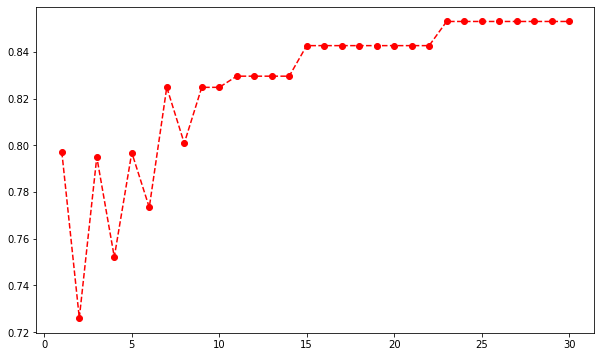

In [23]:
plt.figure(figsize=(10,6))
plt.plot(k_list,score,color='red',linestyle='dashed',marker='o')

# **Fronteiras de complexidade**

Ficar claro como funciona a parte de números de vizinhos. \\
Enxergar a complexidade do modelo

In [33]:
df1 = df.drop('RespondidaNum',axis=1)

In [36]:
df1 = df1.to_numpy()

In [46]:
#Seleção de dados
x = df1[:,[0,3]]
y = df['RespondidaNum'].to_numpy()

In [47]:
#Função para plot de fronteiras de acordo com o número de vizinhos

def plot_fronteiras(n_vizinhos):
  classifier = KNeighborsClassifier(n_neighbors=n_vizinhos)
  classifier.fit(x,y)
  plt.figure(figsize=(10,6))
  plot_decision_regions(x,y,clf=classifier,legend=2)
  plt.title('Fronteiras de complexidade - KNeighbors')

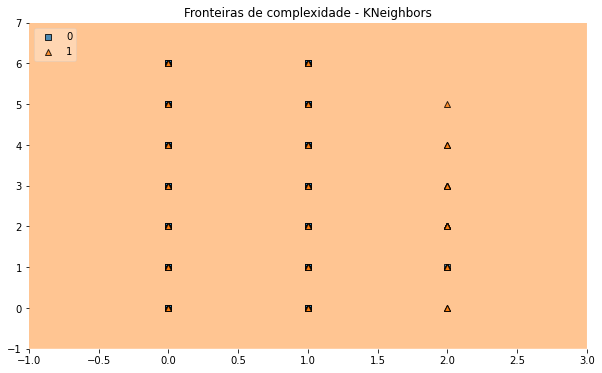

In [48]:
plot_fronteiras(30)